In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_30279_R')

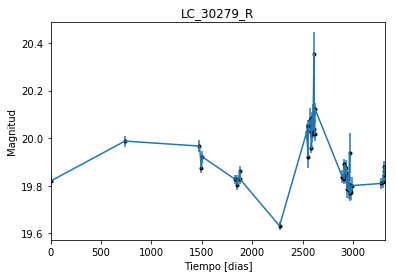

In [8]:
data = np.genfromtxt('LC_30279_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_30279_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

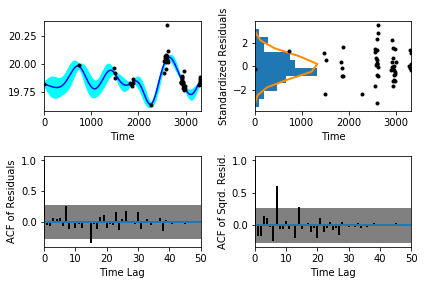

In [5]:
sample.assess_fit()

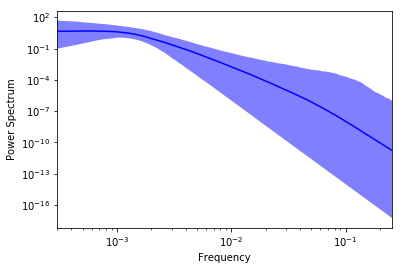

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_30279_R')

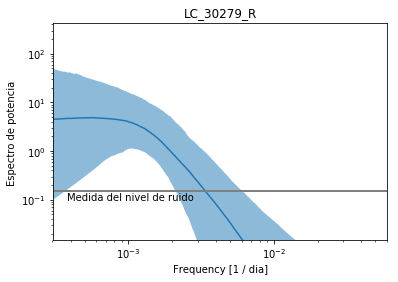

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_30279_R')

Text(0.5,1,'Prediccion , valor esperado LC_30279_R')

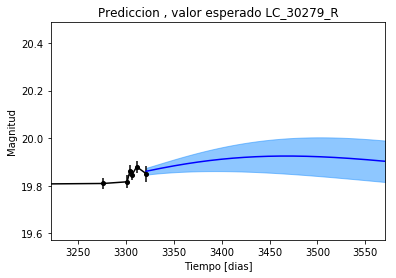

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_30279_R')

Text(0.5,1,'LC_30279_R')

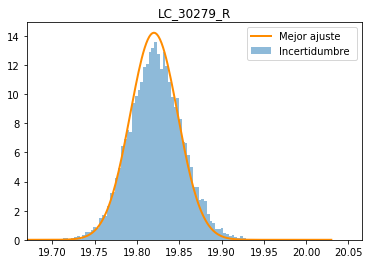

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_30279_R')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_R')

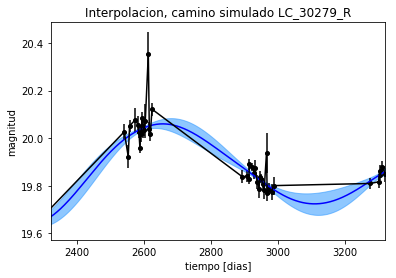

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_R')

Text(0.5,1,'Interpolacion, camino simulado LC_30279_R')

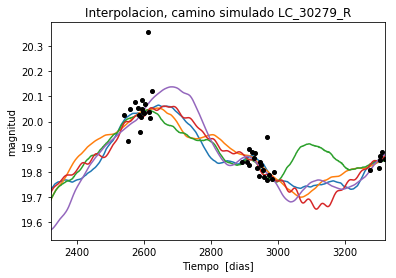

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_30279_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1096.35954666
Median: 0.0023839801194
Standard deviation: 0.0853171887492
68% credibility interval: [ 0.00047597  0.05635508]
95% credibility interval: [  3.20155911e-04   3.47762893e-01]
99% credibility interval: [  3.04912862e-04   4.72060630e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 515.224609089
Median: 0.001071921932
Standard deviation: 0.0425592191291
68% credibility interval: [ 0.00042783  0.01042653]
95% credibility interval: [ 0.00031794  0.12036542]
99% credibility interval: [  3.03993219e-04   3.05511156e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 522.342618382
Median: 0.00658768011303
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 657.794367546
Median: 96.1240721962
Standard deviation: 1.88145207324
68% credibility interval: [ 94.15461668  97.74337483]
95% credibility interval: [ 91.55940864  98.87334791]
99% credibility interval: [ 89.53769656  99.33408064]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 482.408263777
Median: 0.236181574174
Standard deviation: 1.01904438953
68% credibility interval: [ 0.03181725  1.62443611]
95% credibility interval: [ 0.01182248  3.38725142]
99% credibility interval: [ 0.00899933  5.55895886]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 519.694888892
Median: 0.0331338746695
Standard deviation: 2.01632801074
68% credibility interval: [ 0.00174225  0.97796412]
95% credibility interval: [  2.09980397e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 38918.8082611
Median: 1.92090965803e-36
Standard deviation: 4.39864565463e+126
68% credibility interval: [  1.83715606e-99   6.94278980e+56]
95% credibility interval: [  2.04966467e-165   1.07281002e+092]
99% credibility interval: [  1.85611033e-173   3.47011040e+111]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 4027.89828569
Median: 19.8647350493
Standard deviation: 0.0585016773441
68% credibility interval: [ 19.82483186  19.91239624]
95% credibility interval: [ 19.75417121  19.99055157]
99% credibility interval: [ 19.67348234  20.09364713]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 492.962482645
Median: 0.00144594172624
Standard deviation: 0.104404995905
68% credibility interval: [ 0.          0.09966016]
95% credibility interval: [ 0.          0.41959513]
99% credibility interval: [ 0.          0.48510416]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 492.962482645
Median: 0.00144594172624
Standard deviation: 0.104404995905
68% credibility interval: [ 0.          0.09966016]
95% credibility interval: [ 0.          0.41959513]
99% credibility interval: [ 0.          0.48510416]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 474.020918479
Median: 0.0
Standard deviation: 0.000591824578988
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 657.794367546
Median: 96.1240721962
Standard deviation: 1.88145207324
68% credibility interval: [ 94.15461668  97.74337483]
95% credibility interval: [ 91.55940864  98.87334791]
99% credibility interval: [ 89.53769656  99.33408064]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1494.63570043
Median: 0.0174291725695
Standard deviation: 0.0293379819175
68% credibility interval: [ 0.0102532   0.03411957]
95% credibility interval: [ 0.00627436  0.07816873]
99% credibility interval: [ 0.00488594  0.17479167]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1459.70103468
Median: 1.37160966651
Standard deviation: 0.209510020745
68% credibility interval: [ 1.17383976  1.59976223]
95% credibility interval: [ 1.01753403  1.82743545]
99% credibility interval: [ 0.92417865  1.94845201]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 471.639513977
Median: 2.44330920099e-06
Standard deviation: 0.00958175020106
68% credibility interval: [  2.66783041e-61   2.46628932e-04]
95% credibility interval: [  2.26026518e-96   3.28019220e-03]
99% credibility interval: [  1.09265762e-117   6.68689922e-002]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1096.35954666
Median: (-0.0149789888588-0.263237257507j)
Standard deviation: 0.847168794364
68% credibility interval: [-0.35408942+0.j         -0.00299062-1.14962208j]
95% credibility interval: [ -2.18505870e+00+0.j          -2.01159892e-03-0.00689997j]
99% credibility interval: [ -2.96604441e+00+0.j          -1.91582402e-03-0.39561372j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 515.224609089
Median: (-0.00673508413359+0.0827868431837j)
Standard deviation: 0.708404840631
68% credibility interval: [-0.06551185+0.j         -0.00268812+0.00516838j]
95% credibility interval: [-0.75627823+0.22205612j -0.00199765+0.j        ]
99% credibility interval: [ -1.91958321e+00+1.54172124j  -1.91004573e-03+0.j        ]
Posterio